# Problem 1: Pairs Trading Strategy

## Question 1
I have selected Walmart (WMT) and Target (TGT) to be the underlying instruments of my pairs trading strategy. Tight price relationship occurs when two companies involve in similar business, offer similar products, and exhibit similar patterns in different economic cycles. Walmart and Target are the two greatest grocery retails companies, so it is reasonable to suspect the stock price changes of these two companies should be closely related, due to their direct competition. In this project, I am going to explore whether there exists opportunity for gaining profits through typical pairs trading strategy via cointegration approach. 

## Question 2

In [1]:
# import necessary packages for future computations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# define function for running regressions, computing Z-scores, and constructing trading strategies
def pairs_trading(A='WMT.csv',B='TGT.csv',L=50,W=15,thres=1):
    
    wmt = pd.read_csv(A)
    tgt = pd.read_csv(B)
    
    z_score = [0]*L
    wmt_position = [0]*L
    tgt_position = [0]*L
    
    for i in range(L,len(wmt),W):
        
        if i+W <= len(wmt):
            wmt_temp_position = np.zeros(W)
            tgt_temp_position = np.zeros(W)

            X_train = tgt.iloc[i-L:i,5]
            y_train = wmt.iloc[i-L:i,5]
            X_test = tgt.iloc[i:i+W,5]
            y_test = wmt.iloc[i:i+W,5]

            reg = LinearRegression().fit(X_train.values.reshape(-1,1), y_train)

            train_predicted = reg.predict(X_train.values.reshape(-1,1))
            train_res = y_train-train_predicted
            vol = np.std(train_res)

            test_predicted = reg.predict(X_test.values.reshape(-1,1))
            test_res = y_test-test_predicted
            test_z = test_res/vol

            wmt_temp_position[test_z < -thres] = 1
            tgt_temp_position[test_z < -thres] = -y_test[test_z < -thres]/X_test[test_z < -thres]
            wmt_temp_position[test_z > thres] = -1
            tgt_temp_position[test_z > thres] = y_test[test_z > thres]/X_test[test_z > thres]

            z_score += list(test_z)
            wmt_position += list(wmt_temp_position)
            tgt_position += list(tgt_temp_position)
            
        else:
            wmt_temp_position = np.zeros(len(wmt)-i)
            tgt_temp_position = np.zeros(len(wmt)-i)

            X_train = tgt.iloc[i-L:i,5]
            y_train = wmt.iloc[i-L:i,5]
            X_test = tgt.iloc[i:,5]
            y_test = wmt.iloc[i:,5]

            reg = LinearRegression().fit(X_train.values.reshape(-1,1), y_train)

            train_predicted = reg.predict(X_train.values.reshape(-1,1))
            train_res = y_train-train_predicted
            vol = np.std(train_res)

            test_predicted = reg.predict(X_test.values.reshape(-1,1))
            test_res = y_test-test_predicted
            test_z = test_res/vol

            wmt_temp_position[test_z < -thres] = 1
            tgt_temp_position[test_z < -thres] = -y_test[test_z < -thres]/X_test[test_z < -thres]
            wmt_temp_position[test_z > thres] = -1
            tgt_temp_position[test_z > thres] = y_test[test_z > thres]/X_test[test_z > thres]

            z_score += list(test_z)
            wmt_position += list(wmt_temp_position)
            tgt_position += list(tgt_temp_position)
        
    wmt['Z-Score'] = z_score
    tgt['Z-Score'] = z_score
    wmt['Position'] = wmt_position
    tgt['Position'] = tgt_position
    
    return wmt,tgt

## Question 3

In [3]:
# read WMT and TGT daily price data downloaded from Yahoo Finance
wmt = pd.read_csv('WMT.csv')
tgt = pd.read_csv('TGT.csv')

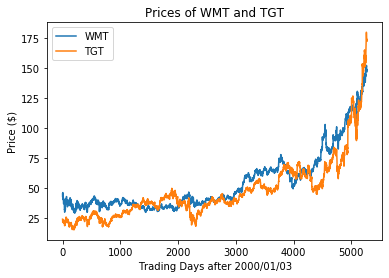

In [4]:
# plot price graphs
plt.plot(wmt['Adj Close'],label='WMT')
plt.plot(tgt['Adj Close'],label='TGT')
plt.xlabel('Trading Days after 2000/01/03')
plt.ylabel('Price ($)')
plt.title('Prices of WMT and TGT')
plt.legend()

From the visualization, we can spot that these two stock prices indeed have tight relationship in overall trend.

In [5]:
# call function to calculate Z-score and trading positions
result = pairs_trading(A='WMT.csv',B='TGT.csv',L=50,W=15,thres=1)

In [6]:
# WMT table
wmt_result = result[0]
wmt_result

,Date,Open,High,Low,Close,Adj Close,Volume,Z-Score,Position
0,2000-01-03,68.375000,69.000000,65.500000,66.812500,45.391777,8369900,0.000000,0.0
1,2000-01-04,65.500000,65.812500,64.187500,64.312500,43.693306,6745100,0.000000,0.0
2,2000-01-05,63.875000,64.375000,62.187500,63.000000,42.801613,7018700,0.000000,0.0
3,2000-01-06,63.000000,64.562500,62.687500,63.687500,43.268681,6544500,0.000000,0.0
4,2000-01-07,64.500000,68.937500,64.500000,68.500000,46.538273,7976900,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
5265,2020-12-04,149.509995,149.509995,147.580002,148.910004,148.367676,6963100,-1.512291,1.0
5266,2020-12-07,148.460007,148.990005,147.160004,148.110001,147.570587,6159700,-1.322717,1.0
5267,2020-12-08,147.360001,149.850006,147.179993,149.449997,148.905701,6905500,-0.721811,0.0
5268,2020-12-09,150.000000,150.000000,147.889999,148.270004,147.729996,6713200,-1.541331,1.0


In [7]:
# TGT table
tgt_result = result[1]
tgt_result

,Date,Open,High,Low,Close,Adj Close,Volume,Z-Score,Position
0,2000-01-03,36.125000,36.375000,35.125000,36.031250,24.407228,2870400,0.000000,0.000000
1,2000-01-04,34.750000,35.343750,34.312500,34.468750,23.348814,3856400,0.000000,0.000000
2,2000-01-05,34.468750,34.968750,33.500000,33.687500,22.819603,4330600,0.000000,0.000000
3,2000-01-06,33.000000,33.125000,31.843750,32.093750,21.740002,8167400,0.000000,0.000000
4,2000-01-07,32.000000,33.843750,31.906250,33.750000,22.861929,4402600,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
5265,2020-12-04,174.380005,175.160004,173.229996,175.029999,175.029999,2935700,-1.512291,-0.847670
5266,2020-12-07,174.270004,174.949997,171.410004,172.910004,172.910004,3430800,-1.322717,-0.853453
5267,2020-12-08,172.500000,173.779999,171.740005,172.720001,172.720001,2682200,-0.721811,0.000000
5268,2020-12-09,173.350006,174.919998,172.410004,174.070007,174.070007,2853800,-1.541331,-0.848682


## Question 4

In [8]:
# calculate net value
wmt_result['Daily Return'] = wmt_result['Adj Close']/wmt_result['Adj Close'].shift(1)-1
tgt_result['Daily Return'] = tgt_result['Adj Close']/tgt_result['Adj Close'].shift(1)-1
NV = (wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])+1
NV = np.nan_to_num(NV,nan=1).cumprod()
NV

array([ 1.        ,  0.88103722,  0.93018355, ..., 14.17132845,
       14.17132845, 14.22052387])

In [9]:
# calculate PnL
print('10-year rough PnL of initial wealth being 1 is equal to',NV[-1]-NV[0])

10-year rough PnL of initial wealth being 1 is equal to 13.220523865860534


Text(0.5, 1.0, 'Net Value of Pairs Trading Strategy')

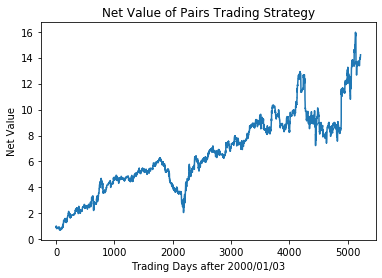

In [10]:
# plot net value
plt.plot(NV)
plt.xlabel('Trading Days after 2000/01/03')
plt.ylabel('Net Value')
plt.title('Net Value of Pairs Trading Strategy')

In [11]:
# calculate sharpe ratio
mean = np.mean(wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])
std = np.std(wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])
print('Sharpe ratio when assume risk-free rate being 0 is equal to',mean/std)


Sharpe ratio when assume risk-free rate being 0 is equal to 0.036066772104959316


In [12]:
# define drawdown function
def drawdown(array):
    
    depth_pct = []
    
    for i in range(len(array)):
        current_max = max(array[:i+1])
        depth_pct.append((current_max-array[i])/current_max)
    
    return depth_pct

Text(0.5, 1.0, 'Drawdowns of Pairs Trading Strategy')

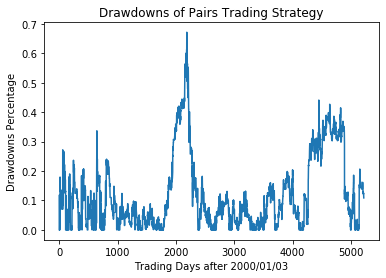

In [13]:
# call function to calculate all drawdowns and plot them accordingly
dds = drawdown(NV)

plt.plot(dds)
plt.xlabel('Trading Days after 2000/01/03')
plt.ylabel('Drawdowns Percentage')
plt.title('Drawdowns of Pairs Trading Strategy')

In [14]:
print('Maximum drawdown is',max(dds))

Maximum drawdown is 0.6714415443083896


## Question 5

### Change L

In [15]:
# when L increases from 50 to 60

result = pairs_trading(A='WMT.csv',B='TGT.csv',L=60,W=15,thres=1)
wmt_result = result[0]
tgt_result = result[1]
wmt_result['Daily Return'] = wmt_result['Adj Close']/wmt_result['Adj Close'].shift(1)-1
tgt_result['Daily Return'] = tgt_result['Adj Close']/tgt_result['Adj Close'].shift(1)-1
NV = (wmt_result.iloc[60:,8].shift(1)*wmt_result.iloc[60:,9]+tgt_result.iloc[60:,8].shift(1)*tgt_result.iloc[60:,9])+1
NV = np.nan_to_num(NV,nan=1).cumprod()

mean = np.mean(wmt_result.iloc[60:,8].shift(1)*wmt_result.iloc[60:,9]+tgt_result.iloc[60:,8].shift(1)*tgt_result.iloc[60:,9])
std = np.std(wmt_result.iloc[60:,8].shift(1)*wmt_result.iloc[60:,9]+tgt_result.iloc[60:,8].shift(1)*tgt_result.iloc[60:,9])

dds = drawdown(NV)

print('New PnL when L increases from 50 to 60 is equal to',NV[-1]-NV[0])
print('New Sharpe ratio when L increases from 50 to 60 is equal to',mean/std)
print('New Maximum drawdown when L increases from 50 to 60 is equal to',max(dds))

New PnL when L increases from 50 to 60 is equal to 8.711836180659825
New Sharpe ratio when L increases from 50 to 60 is equal to 0.03229053820706806
New Maximum drawdown when L increases from 50 to 60 is equal to 0.630938595375305


In [16]:
# when L decreases from 50 to 40

result = pairs_trading(A='WMT.csv',B='TGT.csv',L=40,W=15,thres=1)
wmt_result = result[0]
tgt_result = result[1]
wmt_result['Daily Return'] = wmt_result['Adj Close']/wmt_result['Adj Close'].shift(1)-1
tgt_result['Daily Return'] = tgt_result['Adj Close']/tgt_result['Adj Close'].shift(1)-1
NV = (wmt_result.iloc[40:,8].shift(1)*wmt_result.iloc[40:,9]+tgt_result.iloc[40:,8].shift(1)*tgt_result.iloc[40:,9])+1
NV = np.nan_to_num(NV,nan=1).cumprod()

mean = np.mean(wmt_result.iloc[40:,8].shift(1)*wmt_result.iloc[40:,9]+tgt_result.iloc[40:,8].shift(1)*tgt_result.iloc[40:,9])
std = np.std(wmt_result.iloc[40:,8].shift(1)*wmt_result.iloc[40:,9]+tgt_result.iloc[40:,8].shift(1)*tgt_result.iloc[40:,9])

dds = drawdown(NV)

print('New PnL when L decreases from 50 to 40 is equal to',NV[-1]-NV[0])
print('New Sharpe ratio when L decreases from 50 to 40 is equal to',mean/std)
print('New Maximum drawdown when L decreases from 50 to 40 is equal to',max(dds))

New PnL when L decreases from 50 to 40 is equal to 3.195086854728932
New Sharpe ratio when L decreases from 50 to 40 is equal to 0.02386049664268483
New Maximum drawdown when L decreases from 50 to 40 is equal to 0.6347475964109014


When I change L from 50 to 60 and to 40, both trading strategies give me worse results with less PnL, less Sharpe ratio, and higher maximum drawdown. It is clear to see the effect of changing the number of training samples is significant. Including too few training samples may lead to underfitting while including too many training samples may cover different market situations which can lead to higher noise, so it is crucial to find a good balance between these two when practically implementing the strategy.

### Change W

In [17]:
# when W increases from 15 to 20

result = pairs_trading(A='WMT.csv',B='TGT.csv',L=50,W=20,thres=1)
wmt_result = result[0]
tgt_result = result[1]
wmt_result['Daily Return'] = wmt_result['Adj Close']/wmt_result['Adj Close'].shift(1)-1
tgt_result['Daily Return'] = tgt_result['Adj Close']/tgt_result['Adj Close'].shift(1)-1
NV = (wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])+1
NV = np.nan_to_num(NV,nan=1).cumprod()

mean = np.mean(wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])
std = np.std(wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])

dds = drawdown(NV)

print('New PnL when W increases from 15 to 20 is equal to',NV[-1]-NV[0])
print('New Sharpe ratio when W increases from 15 to 20 is equal to',mean/std)
print('New Maximum drawdown when W increases from 15 to 20 is equal to',max(dds))

New PnL when W increases from 15 to 20 is equal to 8.779243205635309
New Sharpe ratio when W increases from 15 to 20 is equal to 0.032184401432670526
New Maximum drawdown when W increases from 15 to 20 is equal to 0.7219842497895657


In [18]:
# when W decreases from 15 to 10

result = pairs_trading(A='WMT.csv',B='TGT.csv',L=50,W=10,thres=1)
wmt_result = result[0]
tgt_result = result[1]
wmt_result['Daily Return'] = wmt_result['Adj Close']/wmt_result['Adj Close'].shift(1)-1
tgt_result['Daily Return'] = tgt_result['Adj Close']/tgt_result['Adj Close'].shift(1)-1
NV = (wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])+1
NV = np.nan_to_num(NV,nan=1).cumprod()

mean = np.mean(wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])
std = np.std(wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])

dds = drawdown(NV)

print('New PnL when W decreases from 15 to 10 is equal to',NV[-1]-NV[0])
print('New Sharpe ratio when W decreases from 15 to 10 is equal to',mean/std)
print('New Maximum drawdown when W decreases from 15 to 10 is equal to',max(dds))

New PnL when W decreases from 15 to 10 is equal to 11.498548922844453
New Sharpe ratio when W decreases from 15 to 10 is equal to 0.03475243451578591
New Maximum drawdown when W decreases from 15 to 10 is equal to 0.6804461097715169


Intuitively, a shorter out-of-sample period should result a better overall trading performance, because the more frequent regression could incorporate some of the latest information in the market to aid the strategy. Despite the minor discrepency in our observation, W being 20 still induces a worse trading result in all aspects. One possible explanation of this observed discrepency is that the market price relationship between Walmart and Target can be better depicted by rolling regression with step size to be 15 days, for some other market reasons.

### Change Z-Score Threshold

In [19]:
# when Z-score threshold increases from 1 to 1.5

result = pairs_trading(A='WMT.csv',B='TGT.csv',L=50,W=15,thres=1.5)
wmt_result = result[0]
tgt_result = result[1]
wmt_result['Daily Return'] = wmt_result['Adj Close']/wmt_result['Adj Close'].shift(1)-1
tgt_result['Daily Return'] = tgt_result['Adj Close']/tgt_result['Adj Close'].shift(1)-1
NV = (wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])+1
NV = np.nan_to_num(NV,nan=1).cumprod()

mean = np.mean(wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])
std = np.std(wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])

dds = drawdown(NV)

print('New PnL when Z-score threshold increases from 1 to 1.5 is equal to',NV[-1]-NV[0])
print('New Sharpe ratio when Z-score threshold increases from 1 to 1.5 is equal to',mean/std)
print('New Maximum drawdown when Z-score threshold increases from 1 to 1.5 is equal to',max(dds))

New PnL when Z-score threshold increases from 1 to 1.5 is equal to 2.4215314548990166
New Sharpe ratio when Z-score threshold increases from 1 to 1.5 is equal to 0.0225267198757115
New Maximum drawdown when Z-score threshold increases from 1 to 1.5 is equal to 0.5951496115347884


In [20]:
# when Z-score threshold decreases from 1 to 0.5

result = pairs_trading(A='WMT.csv',B='TGT.csv',L=50,W=15,thres=0.5)
wmt_result = result[0]
tgt_result = result[1]
wmt_result['Daily Return'] = wmt_result['Adj Close']/wmt_result['Adj Close'].shift(1)-1
tgt_result['Daily Return'] = tgt_result['Adj Close']/tgt_result['Adj Close'].shift(1)-1
NV = (wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])+1
NV = np.nan_to_num(NV,nan=1).cumprod()

mean = np.mean(wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])
std = np.std(wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])

dds = drawdown(NV)

print('New PnL when Z-score threshold decreases from 1 to 0.5 is equal to',NV[-1]-NV[0])
print('New Sharpe ratio when Z-score threshold decreases from 1 to 0.5 is equal to',mean/std)
print('New Maximum drawdown when Z-score threshold decreases from 1 to 0.5 is equal to',max(dds))

New PnL when Z-score threshold decreases from 1 to 0.5 is equal to 14.120555149855322
New Sharpe ratio when Z-score threshold decreases from 1 to 0.5 is equal to 0.03463204731971791
New Maximum drawdown when Z-score threshold decreases from 1 to 0.5 is equal to 0.7252865141910007


Increasing Z-score threshold leads to more conservative strategy while decreasing it leads to more aggressive strategy. When I change Z-score threshold from 1 to 1.5 and 0.5, neither of these changes gives me better overall trading result. Being more aggressive could potentially incorporate more noises in forming up trading actions, but being more conservative could potentially miss lots of profitable opportunities. The sensitivity analysis presents this rationale well. The more aggressive approach leads to higher absolute return, but its Sharpe ratio is lower and its maximum drawdown is higher than those of the baseline strategy. On the other hand, even though the more conservative approach has less maximum drawdown, its PnL and Sharpe ratio are still lower than those of the baseline strategy.

## Pairs Trading Strategy Performance Compared with Two Stocks

In [21]:
# recalculate the baseline strategy
result = pairs_trading(A='WMT.csv',B='TGT.csv',L=50,W=15,thres=1)
wmt_result = result[0]
tgt_result = result[1]
wmt_result['Daily Return'] = wmt_result['Adj Close']/wmt_result['Adj Close'].shift(1)-1
tgt_result['Daily Return'] = tgt_result['Adj Close']/tgt_result['Adj Close'].shift(1)-1
NV = (wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])+1
NV = np.nan_to_num(NV,nan=1).cumprod()

mean = np.mean(wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])
std = np.std(wmt_result.iloc[50:,8].shift(1)*wmt_result.iloc[50:,9]+tgt_result.iloc[50:,8].shift(1)*tgt_result.iloc[50:,9])

dds = drawdown(NV)

In [22]:
# calculate PnL, Sharpe ratio, and maximum drawdown for strategy and two stocks
strategy = [NV[-1]-NV[0],mean/std,max(dds)]
WMT = [wmt['Adj Close'].values[-1]/wmt['Adj Close'].values[0]-1,np.mean((wmt['Adj Close']/wmt['Adj Close'].shift(1)-1).dropna())/np.std((wmt['Adj Close']/wmt['Adj Close'].shift(1)-1).dropna()),max(drawdown(wmt['Adj Close']))]
TGT = [tgt['Adj Close'].values[-1]/tgt['Adj Close'].values[0]-1,np.mean((tgt['Adj Close']/tgt['Adj Close'].shift(1)-1).dropna())/np.std((tgt['Adj Close']/tgt['Adj Close'].shift(1)-1).dropna()),max(drawdown(tgt['Adj Close']))]

In [23]:
# present the results through table
df = pd.DataFrame(data={'Pairs Trading Strategy': strategy, 'WMT': WMT, 'TGT': TGT})
df.index = ['PnL','Sharpe Ratio','Max Drawdown']
df

,Pairs Trading Strategy,WMT,TGT
PnL,13.220524,2.239353,6.063481
Sharpe Ratio,0.036067,0.022292,0.028298
Max Drawdown,0.671442,0.366425,0.629606
